## Retail Sales By Industries

### Data Cleaning and Wrangling

In [7]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq

In [8]:
# Reading file

retailsales=pd.read_csv('../../data/retailsalesbyIndustry/retailSalesbyIndustry.csv')

In [9]:
# Renaming columns as per required
retailsales.rename(columns = {'REF_DATE':'DATE', 
                                            'GEO':'LOCATION',
                                            'North American Industry Classification System (NAICS)':'INDUSTRY',
                                            'Adjustments':'ADJUSTMENTS'
                                           },inplace = True)

In [10]:
# Filtering columns as needed and extracting required columns
retailsales_filtered=retailsales[(retailsales['LOCATION'] == 'Canada') & 
                 (retailsales['INDUSTRY'] == 'Retail trade [44-45]')&
                 (retailsales['ADJUSTMENTS'] == 'Seasonally adjusted')&
                 (retailsales['DATE'] >= '2004-01')]
retailsales_final = retailsales_filtered[['DATE', 'VALUE']].copy()

#Changing data type of date
retailsales_final['DATE'] =  pd.to_datetime(retailsales_final['DATE'])
retailsales_final.reset_index(drop=True)

,DATE,VALUE
0,2004-01-01,27935993.0
1,2004-02-01,28719948.0
2,2004-03-01,28689514.0
3,2004-04-01,28254086.0
4,2004-05-01,28554094.0
...,...,...
213,2021-10-01,58218955.0
214,2021-11-01,58750669.0
215,2021-12-01,57919779.0
216,2022-01-01,59857374.0


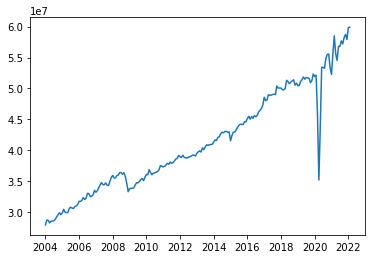

In [11]:
# plot

retailsales_date=retailsales_final.set_index('DATE')

plt.plot(retailsales_date)
plt.show()

## Calculating keywords using Google Trends

In [76]:
# Reading file for Categories
retailcat=pd.read_csv('../../data/keywords_data/RETAIL_SALES.csv')

In [77]:
retailcatdat = retailcat[['CatNo']].copy()

### Function to get the queries, topics and thus keywords using pytrends

In [78]:
pytrends = TrendReq(hl='en-US', tz=360, backoff_factor=0.1)

def get_trend(keyword=[''], category='0'):
    """ Function for getting trends for selected keywords
        
        arguments: 
        
        Keywords: data type is string: stores list of keywords
        category: data type is string: stores the code for category
        
        returns: google trend data, related queries and related topics as a data frame  
    """
    
    kw_list=keyword
    cat=category
    timeframe='2004-01-01 2022-01-01'
    geo ='CA'
    gprop =''
    
    pytrends.build_payload(kw_list, cat, timeframe, geo, gprop)
    data = pytrends.interest_over_time()
    queries = pytrends.related_queries()
    topics = pytrends.related_topics()
    return data, queries, topics

In [79]:
keywordsDictQuery = dict() #Dictionary for queries
keywordsDictTopic = dict() #Dictionary for topic


for index, row in retailcatdat.iterrows():
    
    #Calling function
    data, queries, topics = get_trend(keyword=[''],category=str(row['CatNo']))
    
    
    #Code to append data for different columns in data frame
    
    if index==0:
        FinalData, queries, topics=get_trend(keyword=[''],category=str(row['CatNo']))
        FinalData.rename(columns = {'':str(row['CatNo'])}, inplace = True)
        FinalData=FinalData.drop(columns=['isPartial'])
    else:
        data, queries, topics=get_trend(keyword=[''],category=str(row['CatNo']))
        data.rename(columns = {'':str(row['CatNo'])}, inplace = True)
        data=data.drop(columns=['isPartial'])
        data = data[str(row['CatNo'])]
        FinalData = FinalData.join(data)
    
    #Code to store queries in a dictionary
    queries = queries['']['top']
    top5_query = pd.DataFrame(queries['query'].copy().head(5))
    top5_query = top5_query['query'].values.tolist()  
    keywordsDictQuery[str(row['CatNo'])] = top5_query
    
    #Code to store topics in a dictionary
    topics = topics['']['top']
    top5_topic = pd.DataFrame(topics['topic_title'].copy().head(5))
    top5_topic = top5_topic['topic_title'].values.tolist()
    keywordsDictTopic[str(row['CatNo'])] = top5_topic

In [80]:
FinalData

,841,47,1190,1191,1140,1213,1013,1214,806,810,...,355,1146,18,1225,270,659,1268,38,844,614
date,,,,,,,,,,,,,,,,,,,,,
2004-01-01,49,91,100,51,58,48,86,77,100,90,...,96,38,86,54,90,82,16,91,93,83
2004-02-01,48,89,79,57,57,59,100,90,86,83,...,83,32,82,49,84,89,15,92,100,90
2004-03-01,44,94,63,77,68,64,83,93,89,87,...,91,29,81,51,87,89,23,93,80,86
2004-04-01,47,93,88,93,72,72,91,98,92,91,...,80,32,81,53,79,82,21,93,92,93
2004-05-01,48,95,60,95,74,76,90,89,91,98,...,78,33,80,50,74,81,43,92,89,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,65,44,23,31,35,60,27,68,19,48,...,27,17,47,80,83,38,16,58,30,29
2021-10-01,65,43,23,26,26,47,26,64,18,59,...,24,21,49,83,86,40,26,55,29,37
2021-11-01,70,43,25,24,24,34,26,58,19,64,...,27,25,58,93,91,42,24,60,32,36


In [82]:
FinalData.to_csv('FinalRetailData.csv')

In [23]:
keywordsDictTopic

{'841': ['Flyer', 'Real Canadian Superstore', 'Canada', 'No Frills', 'Costco'],
 '47': ['Car', 'Canada', 'Sales', 'Ford', 'Honda'],
 '1190': ['Car', 'General Motors', 'Ferguson plc', 'Canada', 'Ford'],
 '1191': ['Bicycle', 'Canada', 'Motorcycle', 'Mountain bike', 'Mountain'],
 '1140': ['Boat', 'Sales', 'KAYAK', 'Kayak', 'Outboard motor'],
 '1213': ['Recreational vehicle', 'Trailer', 'Sales', 'Caravan', 'Travel'],
 '1013': ['Car', 'Classic car', 'Sales', 'Auction', 'Classic'],
 '1214': ['Truck', 'Trailer', 'Sales', 'Ritchie Bros. Auctioneers', 'Car'],
 '806': ['Lamborghini', 'Lamborghini', 'Car', 'Bugatti', 'Truck'],
 '810': ['Car',
  'Electric vehicle',
  'Electric car',
  'Hybrid vehicle',
  'Canada'],
 '1317': ['Car', 'Smart', 'Smart', 'Door', 'Canada'],
 '273': ['Motorcycle',
  'Harley-Davidson',
  'Canada',
  'Sales',
  'Yamaha Motor Company'],
 '148': ['Polaris Inc.',
  'Ski-Doo',
  'All-terrain vehicle',
  'Snowmobile',
  'Arctic Cat'],
 '1147': ['Airplane', 'Aircraft', 'Sales', 

In [128]:
# data, queries=get_trend(keyword=[''],category=str(retailcatdat['CatNo'].iloc[0]))
# queries = queries['']['top']
# top5 = pd.DataFrame(queries['query'].copy().head(5))
# top5 = top5['query'].values.tolist()
# keywordsDict = dict()
# keywordsDict[str(retailcatdat['CatNo'].iloc[0])] = top5
# keywordsDict